In [0]:
!pip3 uninstall tensorflow
!pip3 install tensorflow.gpu==2.0.0

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
%cd /content/drive/My Drive/hoda dataset
%ls

/content/drive/My Drive/hoda dataset
 cnn_model.h5                            'hoda dataset.py'/
 cnn_weight.h5                            __pycache__/
'hoda dataset.h5'                         RemainingSamples.cdb
 hoda_dataset_handwrite_recognition.py/  'Test 20000.cdb'
 hoda_dataset_helper.py                  'Train 60000.cdb'


In [0]:
from hoda_dataset_helper import read_hoda
from hoda_dataset_helper import __read_hoda_dataset
from hoda_dataset_helper import __read_hoda_cdb

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten

Load Dataset

In [0]:
# Reading train dataset 
X_train, Y_train = __read_hoda_dataset(dataset_path='./Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False ,
                                reshape=False)

In [0]:
# reading test dataset
X_test, Y_test = __read_hoda_dataset(dataset_path='./Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=False)

In [0]:
# Reading remain samples dataset 
X_remain, Y_remain = __read_hoda_dataset('./RemainingSamples.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=False,
                                             reshape=False)

In [0]:
# reading train image
train_images, train_labels = __read_hoda_cdb('./Train 60000.cdb')

In [0]:
# reading test image
test_images, test_labels = __read_hoda_cdb('./Test 20000.cdb')

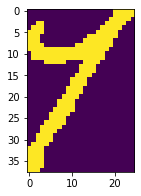

In [13]:
# plot a data sample

fig = plt.figure(figsize=(15, 3))
plt.imshow(train_images[11])

In [0]:
#normalization
X_train =X_train / 255.0
X_test = X_test /255.0
X_remain= X_remain /255.0

In [0]:
# reshape the train and remain samples to 3 dimension
X_train= X_train.reshape(60000,32,32,1)
X_remain= X_remain.reshape(22352,32,32,1)
X_test= X_test.reshape(20000,32,32,1)

In [0]:
Y_train  =   to_categorical(Y_train, num_classes = 10)
Y_test   =   to_categorical(Y_test, num_classes = 10)
Y_remain =   to_categorical(Y_remain, num_classes = 10)

In [17]:
print(f'shape of X_train : {X_train.shape}')
print(f'shape of Y_train : {Y_train.shape}')

print(f'shape of X_test i: {X_test.shape}')
print(f'shape of Y_test  : {Y_test.shape}')

print(f'shape of X_reamin : {X_remain.shape}')
print(f'shape of Y_remain : {Y_remain.shape}')

shape of X_train : (60000, 32, 32, 1)
shape of Y_train : (60000, 10)
shape of X_test i: (20000, 32, 32, 1)
shape of Y_test  : (20000, 10)
shape of X_reamin : (22352, 32, 32, 1)
shape of Y_remain : (22352, 10)


In [0]:
# split training dataset to validation and train samples
random_seed=2
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train,test_size=0.1, random_state=random_seed)

In [19]:
print(f'shape of X_val is : {X_val.shape}')
print(f'shape of Y_val is : {Y_val.shape}')

shape of X_val is : (6000, 32, 32, 1)
shape of Y_val is : (6000, 10)


CNN model

In [0]:
model= Sequential()

model.add(Conv2D(32,(5,5), activation='relu', padding='same', input_shape=(32,32,1)))
model.add(Conv2D(32,(5,5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3), activation='relu', padding='same'))#


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)         

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
epochs = 40
batch_size = 32

In [29]:
result=model.fit(X_train, Y_train,epochs=epochs, batch_size=batch_size, validation_data=(X_val,Y_val), verbose=1)
                

Epoch 1/40
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3498 - accuracy: 0.8743 - val_loss: 0.0453 - val_accuracy: 0.9853
Epoch 2/40
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.0274 - val_accuracy: 0.9917
Epoch 3/40
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0328 - val_accuracy: 0.9917
Epoch 4/40
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0286 - accuracy: 0.9917 - val_loss: 0.0343 - val_accuracy: 0.9885
Epoch 5/40
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0275 - accuracy: 0.9924 - val_loss: 0.0232 - val_accuracy: 0.9933
Epoch 6/40
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0263 - accuracy: 0.9927 - val_loss: 0.0199 - val_accuracy: 0.9943
Epoch 7/40
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0251 - accuracy: 0.9938 - val_loss: 0.0238 - val_ac

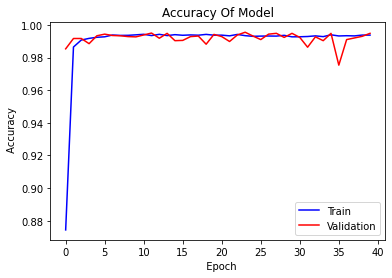

In [30]:
# plot train and validation accuracy

plt.plot(result.history['accuracy'], color='b', label='training accuracy')
plt.plot(result.history['val_accuracy'], color='r', label='validation accuracy')
plt.title('Accuracy Of Model')
plt.ylabel(' Accuracy')
plt.xlabel('  Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

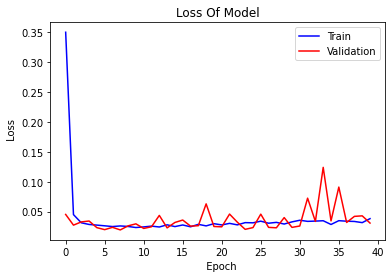

In [32]:
# plot train and validation accuracy

plt.plot(result.history['loss'], color='b', label='training loss')
plt.plot(result.history['val_loss'], color='r', label='validation loss')
plt.title('Loss Of Model')
plt.ylabel(' Loss')
plt.xlabel('  Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [33]:
model.evaluate(X_val, Y_val, verbose=1)

188/188 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.9948


[0.030880099162459373, 0.9948333501815796]

In [36]:
model.evaluate(X_test, Y_test, verbose=1)

625/625 [==============================] - 2s 3ms/step - loss: 0.0809 - accuracy: 0.9875


[0.08092094212770462, 0.987500011920929]

In [0]:
import pandas as pd

results = model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results)


In [59]:
results

0        0
1        0
2        5
3        0
4        0
        ..
19995    9
19996    9
19997    9
19998    9
19999    9
Length: 20000, dtype: int64

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_hoda_dataset.csv",index=False)

In [0]:
model_2.summary()



Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_170 (Conv2D)          (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 8, 8, 64)        